In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! cp "/content/drive/My Drive/Dataset/dogs-vs-cats/test1.zip" /content/
! cp "/content/drive/My Drive/Dataset/dogs-vs-cats/train.zip" /content/

! unzip /content/test1.zip > data_unzip.log
! unzip /content/train.zip > data_unzip.log

In [3]:
import os
import numpy as np

im_W, im_H = 100, 100
datachannel = 3

class_filenames = os.listdir("/content/train")
data_2d = np.empty((len(class_filenames), im_W,im_H, datachannel), dtype="uint8")
label = [0] * len(class_filenames)

In [4]:
from PIL import Image

for i in range(len(class_filenames)):
    
    if(class_filenames[i][0] == 'c'):
        label[i] = 0
    if(class_filenames[i][0] == 'd'):
        label[i] = 1
    
    img = Image.open("/content/train/" + class_filenames[i])
    reimg = img.resize((im_W,im_H))
    
    npimg_2d = np.asarray(reimg, dtype="uint8")
    data_2d[i,:,:,:] = npimg_2d

In [5]:
from keras.utils import to_categorical

label_ohe = to_categorical(label)
non_data_2d = data_2d.astype('float32')/255

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

cnn = Sequential()
cnn.add(Conv2D(32,(5,5),activation='relu', padding='same', input_shape=(100,100,3)))

cnn.add(Dropout(0.2))
cnn.add(MaxPooling2D((2,2)))

cnn.add(Conv2D(64,(4,4),activation='relu', padding='same'))
cnn.add(Dropout(0.2))
cnn.add(MaxPooling2D((2,2)))

cnn.add(Conv2D(128,(3,3),activation='relu', padding='same'))
cnn.add(Dropout(0.2))
cnn.add(MaxPooling2D((2,2)))

cnn.add(Flatten())
cnn.add(Dropout(0.2))

cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))

cnn.add(Dense(2, activation='softmax'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      2432      
_________________________________________________________________
dropout (Dropout)            (None, 100, 100, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        32832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 128)       7

In [7]:
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [8]:
history = cnn.fit(x=non_data_2d, y=label_ohe, batch_size=100, epochs=30, validation_split=0.1)

Epoch 1/30
225/225 [==============================] - 733s 3s/step - loss: 0.6526 - acc: 0.6189 - val_loss: 0.6029 - val_acc: 0.7184
Epoch 2/30
225/225 [==============================] - 731s 3s/step - loss: 0.5609 - acc: 0.7146 - val_loss: 0.5419 - val_acc: 0.7572
Epoch 3/30
225/225 [==============================] - 730s 3s/step - loss: 0.5052 - acc: 0.7536 - val_loss: 0.4779 - val_acc: 0.8004
Epoch 4/30
225/225 [==============================] - 734s 3s/step - loss: 0.4507 - acc: 0.7896 - val_loss: 0.4265 - val_acc: 0.8208
Epoch 5/30
225/225 [==============================] - 735s 3s/step - loss: 0.3999 - acc: 0.8192 - val_loss: 0.3800 - val_acc: 0.8428
Epoch 6/30
225/225 [==============================] - 733s 3s/step - loss: 0.3671 - acc: 0.8361 - val_loss: 0.3991 - val_acc: 0.8308
Epoch 7/30
225/225 [==============================] - 731s 3s/step - loss: 0.3302 - acc: 0.8575 - val_loss: 0.3665 - val_acc: 0.8488
Epoch 8/30
225/225 [==============================] - 728s 3s/step - 

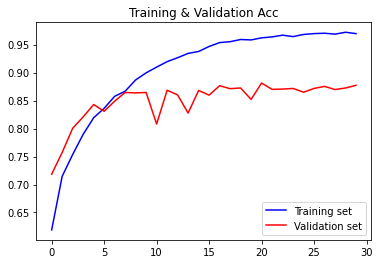

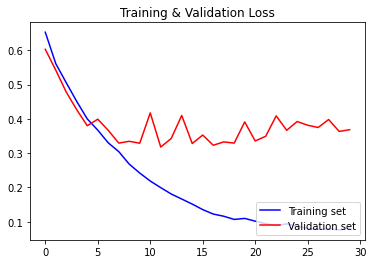

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.title("Training & Validation Acc")
plt.plot(np.arange(len(acc)), acc,color='b', label="Training set")
plt.plot(np.arange(len(val_acc)), val_acc,color='r', label="Validation set")
plt.legend(loc='lower right')
plt.show()

plt.title("Training & Validation Loss")
plt.plot(np.arange(len(loss)), loss,color='b', label="Training set")
plt.plot(np.arange(len(val_loss)), val_loss,color='r', label="Validation set")
plt.legend(loc='lower right')
plt.show()

782/782 [==============================] - 189s 242ms/step - loss: 0.0615 - acc: 0.9856
訓練集的準確度為：0.9856
訓練集的損失值為：0.0615


Text(0.5, 1.0, 'Accuracy: 0.9856')

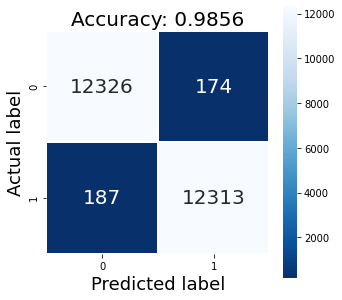

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

train_loss, train_acc = cnn.evaluate(non_data_2d, label_ohe)
print("訓練集的準確度為：%0.4f" %(train_acc))
print("訓練集的損失值為：%0.4f" %(train_loss))

predict = cnn.predict(non_data_2d)
predictions = [np.argmax(one_hot)for one_hot in predict]

cm = confusion_matrix(label, predictions)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1.0, square = True, cmap = 'Blues_r',annot_kws={"size": 20});
plt.ylabel('Actual label', size = 18);
plt.xlabel('Predicted label', size = 18);
plt.title('Accuracy: %0.4f' %(train_acc), size = 20)

In [11]:
from keras.models import load_model

cnn.save('cnn_dog_vs_cat.h5')

from tensorflow.keras.models import load_model

cnn = load_model('cnn_dog_vs_cat.h5')